In [1]:
from model_manager import section1, section2, single_model
import optimizer as opt
import dataset_creator
from constants import *

Num GPUs Available:  1


c:\Users\aless\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dataset1_generator = dataset_creator.Dataset1()
dataset1_generator.generate_dataset(train_size=30000, test_size=10000, whole_dataset=True)

[I 2024-12-09 22:38:32,044] A new study created in memory with name: no-name-9f822e47-65e5-41fb-a9d5-ee858934a2a0


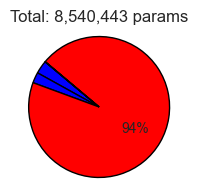

In [ ]:
optim = opt.BayesianOptimizer()


params = {
    'max_conv_layers': 5,
    'max_dense_layers': 5,
    'max_conv_size': 256,
    'max_dense_size': 256,
    'epochs': 10
}


model = section1()

best_trial = optim.optimize(model, target=1.5, initial_params=params, max_trials=10, write_to_file=True)

In [ ]:
print(best_conv, best_dense)

In [ ]:
dataset2_gen = dataset_creator.Dataset2(weights=SECT1_CHECKPOINT_FOLDER + f'model_optimize_{iter_num}.weights.h5', conv_layers=best_conv, dense_layers=best_dense)
dataset2_gen.generate_dataset()

In [ ]:
conv_layers = [256,64,16]
dense_layers = [64,128,256]
target = 0.9
model = section2()
optimizer = opt.Optimizer()
best_conv, best_dense, iter_num = optimizer.optimize(model, conv_layers, dense_layers, target, max_iter=10, max_failed_trains=2)

In [ ]:
print(best_conv, best_dense, iter_num)

In [ ]:
model = section2()
model.initialise_data_and_model(best_conv, best_dense)
model.eval_random()

In [ ]:
conv_layers = [256,64,16]
dense_layers = [64,128,256]
target = 0.9
model = single_model()
optimizer = opt.Optimizer()
best_conv, best_dense, iter_num = optimizer.optimize(model, conv_layers, dense_layers, target, max_iter=10, max_failed_trains=2)
print(best_conv, best_dense, iter_num)

In [ ]:
[104, 25, 5], [25, 51, 104]

In [ ]:
optim = opt.BayesianOptimizer()

initial_params = {"conv_layers": [104, 25, 5], "dense_layers": [25, 51, 104]}  # Your initial configuration
model = single_model()

best_trial = optim.optimize(model, initial_params, target=0.9, max_trials=20)

Best trial: {'conv_0_size': 5, 'conv_1_size': 15, 'conv_2_size': 26, 'dense_0_size': 98, 'dense_1_size': 180, 'dense_2_size': 164}

In [ ]:
params_dics = best_trial.params
best_conv = [param for key, param in params_dics.items() if key[0] == 'c']
best_dense = [param for key, param in params_dics.items() if key[0] == 'd']

In [ ]:
print(best_conv, best_dense)

In [ ]:
best_conv = [23, 13, 72]
best_dense = [84, 163, 181]
params = {'epochs': 30,
        'tensorboard': True, 
        'cp_callback': False,
        'weights': None,
        'stop_at': 0.9,
        'save_final': True,
        'weight_string': f'_best'
        }
model = single_model()
model.initialise_data_and_model(best_conv, best_dense)
_,time = model.train(params)
print(time)

In [ ]:
model.model.load_weights(SINGLE_CHECKPOINT_FOLDER + 'single_model_best.weights.h5')

In [ ]:
model.eval_random()